In [53]:
import pandas as pd

In [54]:
df = pd.read_csv("data/wiki_data_depth_3_cleaned.csv", sep=";")

In [55]:
df.head()

,title,text,category,url
0,Ekspert,"Ekspert (noun) er en person, som er meget vide...",Uddannelse,https://da.wikipedia.org/wiki/Ekspert
1,Prægraduat uddannelse,"Prægraduat uddannelse betyder ordret ""uddannel...",Uddannelse,https://da.wikipedia.org/wiki/Pr%C3%A6graduat_...
2,South African Students' Organisation,South African Students' Organisation ( SASO) v...,Uddannelse,https://da.wikipedia.org/wiki/South_African_St...
3,Civiløkonom,En civiløkonom er en person med en erhvervsøko...,Uddannelse,https://da.wikipedia.org/wiki/Civil%C3%B8konom
4,VUC Aarhus,Aarhus HF & VUC er et voksenuddannelsescenter ...,Uddannelse,https://da.wikipedia.org/wiki/VUC_Aarhus


In [56]:
df.iloc[1]["text"]

'Prægraduat uddannelse betyder ordret "uddannelse før dimission" eller "uddannelse før tildeling af uddannelsesgrad". Prægraduat uddannelse bruges overordnet som samlet betegnelse for den grunduddannelse eller det studieforløb på en videregående uddannelse, som en studerende er i færd med at gennemføre forud for sin dimission. En studerende på en prægraduat uddannelse kaldes en prægraduatstuderende. Se også. Postgraduat uddannelse.'

In [8]:
# load data/wiki_3/uddanelse/Prægraduat uddannelse
with open("data/wiki_3/Uddannelse/Prægraduat uddannelse.txt", "r") as f:
    text_file = f.read()

title = text_file.split("\t")[0]
url = text_file.split("\t")[1]
category = text_file.split("\t")[2]
text = text_file.split("\t")[3]

In [9]:
text

'<div class="mw-body-content mw-content-ltr" dir="ltr" id="mw-content-text" lang="da">\n <div class="mw-parser-output">\n  <table class="box-Ingen_kilder plainlinks metadata ambox ambox-content ambox-Ingen-kilder" role="presentation">\n  </table>\n  <style data-mw-deduplicate="TemplateStyles:r10266497">\n   .mw-parser-output th.mbox-text,.mw-parser-output td.mbox-text{border:none;padding:0.25em 0.9em;width:100%}.mw-parser-output td.mbox-image{border:none;padding:2px 0 2px 0.9em;text-align:center}.mw-parser-output td.mbox-imageright{border:none;padding:2px 0.9em 2px 0;text-align:center}.mw-parser-output td.mbox-empty-cell{border:none;padding:0;width:1px}.mw-parser-output table.ambox{margin:0 10%;border:1px solid #a2a9b1;border-left:10px solid #36c;background-color:#fbfbfb;box-sizing:border-box}.mw-parser-output table.ambox+table.ambox{margin-top:-1px}.mw-parser-output .ambox th.mbox-text,.mw-parser-output .ambox td.mbox-text{padding:0.25em 0.5em}.mw-parser-output .ambox td.mbox-image{pa

In [45]:
import html2text
h = html2text.HTML2Text()
h.ignore_links = True
h.ignore_emphasis = True
h.ignore_images = True
h.ignore_tables = True
h.body_width = 0
h.unicode_snob = True
h.single_line_break = True
h.skip_internal_links = True


In [46]:
t = h.handle(text) 
t

'Prægraduat uddannelse  betyder ordret "  uddannelse  før  dimission  " eller "  uddannelse  før tildeling af  uddannelsesgrad  ". Prægraduat uddannelse bruges overordnet som samlet betegnelse for den grunduddannelse eller det studieforløb på en  videregående uddannelse  , som en  studerende  er i færd med at gennemføre forud for sin  dimission  . En studerende på en prægraduat uddannelse kaldes en  prægraduatstuderende  . \n##  Se også  [  redigér  |  rediger kildetekst  ] \n  * Postgraduat uddannelse \n\n\n  \n\nHentet fra "  https://da.wikipedia.org/w/index.php?title=Prægraduat_uddannelse&oldid=7785779  " \n'

In [52]:
# regex find all text between " --> replace with @
import re
t = """betyder ordret "  uddannelse  før  dimission  " eller '  uddannelse  før tildeling af  uddannelsesgrad  '. """
res = re.findall(r'\"(.+?)\"', t)

for r in res:
    print(r)
    t = t.replace(r, f"{r.strip()}")
t

  uddannelse  før  dimission  


'betyder ordret "uddannelse  før  dimission" eller \'  uddannelse  før tildeling af  uddannelsesgrad  \'. '

In [22]:
# check text length distribution

df["text_length"] = df["text"].apply(lambda x: len(x.split(" ")))

df["text_length"].describe()


count     1347.000000
mean       475.688938
std        970.700017
min         10.000000
25%        104.000000
50%        217.000000
75%        481.500000
max      20374.000000
Name: text_length, dtype: float64

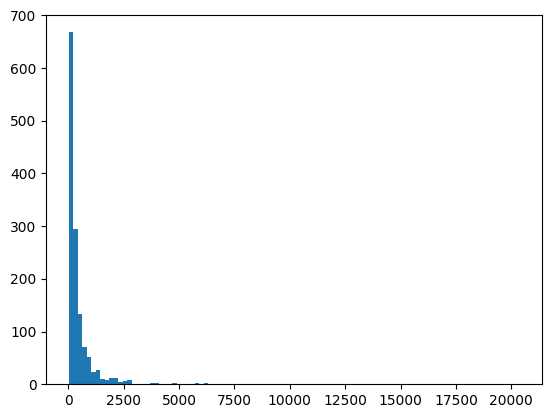

In [24]:
import matplotlib.pyplot as plt
plt.hist(df["text_length"], bins=100);

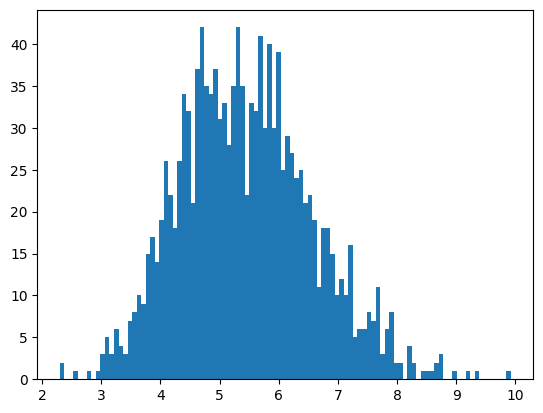

In [25]:
# check distribution of log text length
import numpy as np
plt.hist(np.log(df["text_length"]), bins=100);


The data seems log-normal distributed. 

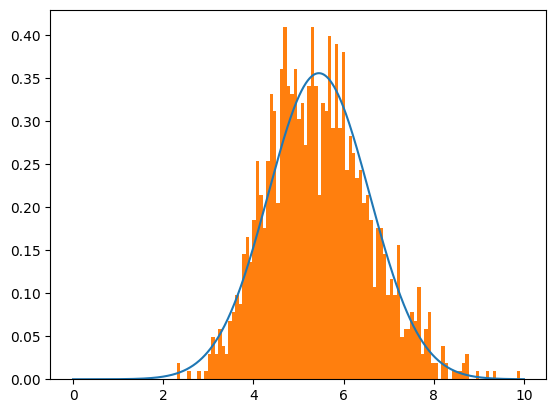

In [30]:
# plot a normal distribution with the same mean and std

from scipy.stats import norm

mu, std = norm.fit(np.log(df["text_length"]))
x = np.linspace(0, 10, 1000)
plt.plot(x, norm.pdf(x, mu, std));
plt.hist(np.log(df["text_length"]), bins=100, density=True);
